In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\nilka\\OneDrive\\Desktop\\excelr\\self paced course\\data science assignment\\1.assignments\\5.multi linear regression\\50_Startups.csv")
data.head()

,R_and_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_and_DSpend    50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R_and_DSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.corr()

,R_and_DSpend,Administration,MarketingSpend,Profit
R_and_DSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


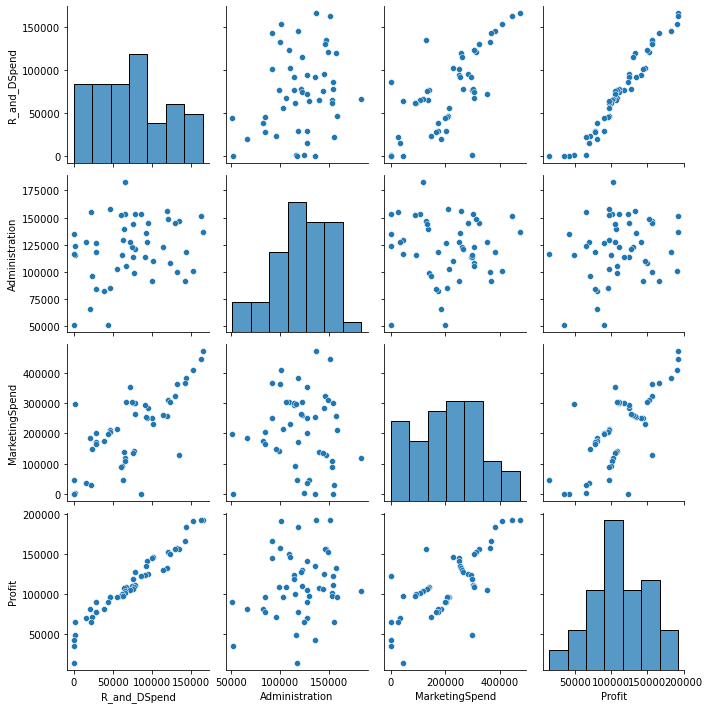

In [6]:
sns.pairplot(data)

In [7]:
#MODEL CONSIDERING ALL INPUT PARAMETERS

In [8]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ R_and_DSpend + Administration + MarketingSpend',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        15:03:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_and_DSpend       0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see form above table that R^2 value is good for model but p value of Administration and Marketing spend is >0.05

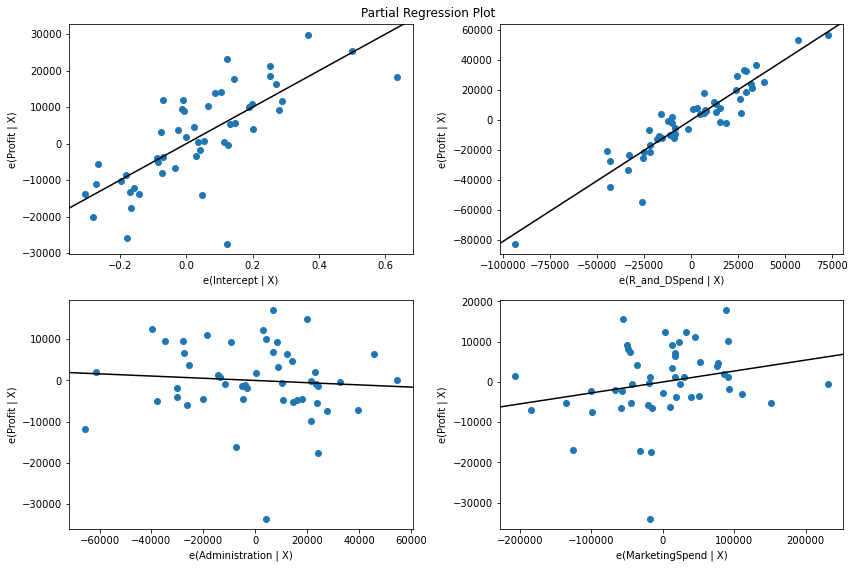

In [9]:
#added variable plot
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [10]:
#identifying influeential observation
model_influence=model.get_influence()
(c,_)= model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [11]:
data[c>0.5]

,R_and_DSpend,Administration,MarketingSpend,State,Profit


SO, data has no influential observation

# creating new model

In [12]:
# model of profit ~ administration
model_administration = smf.ols('Profit ~ Administration ',data=data).fit()
model_administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 15 Mar 2022   Prob (F-statistic):              0.162
Time:                        15:03:18   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#model of profit ~ Marketing spend
model_marketingspend = smf.ols('Profit ~ MarketingSpend ',data=data).fit()
model_marketingspend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.38e-10
Time:                        15:03:18   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF

In [14]:
rsq_MarketingSpend = smf.ols('MarketingSpend ~ R_and_DSpend + Administration',data=data).fit().rsquared
VIF_MarketingSpend = 1/ (rsq_MarketingSpend)
VIF_MarketingSpend

1.753708268878305

In [15]:
rsq_R_and_DSpend= smf.ols(' R_and_DSpend~ MarketingSpend + Administration',data=data).fit().rsquared
VIF_R_and_DSpend = 1/ (rsq_R_and_DSpend)
VIF_R_and_DSpend

1.680780114377191

In [16]:
rsq_Administration= smf.ols(' Administration~ MarketingSpend + R_and_DSpend',data=data).fit().rsquared
VIF_Administration = 1/ (rsq_Administration)
VIF_Administration

6.711315599924667

WE CAN SEE ALL INPUT VARIABLES ARE SIGNIFICANT FROM THE VIF VALUES.

# TRANSFORMATIONS

In [17]:
data['log_Administration'] = np.log(data.Administration)
data

,R_and_DSpend,Administration,MarketingSpend,State,Profit,log_Administration
0,165349.20,136897.80,471784.10,New York,192261.83,11.826990
1,162597.70,151377.59,443898.53,California,191792.06,11.927533
2,153441.51,101145.55,407934.54,Florida,191050.39,11.524316
3,144372.41,118671.85,383199.62,New York,182901.99,11.684117
4,142107.34,91391.77,366168.42,Florida,166187.94,11.422911
5,131876.90,99814.71,362861.36,New York,156991.12,11.511071
6,134615.46,147198.87,127716.82,California,156122.51,11.899540
7,130298.13,145530.06,323876.68,Florida,155752.60,11.888138
8,120542.52,148718.95,311613.29,New York,152211.77,11.909814
9,123334.88,108679.17,304981.62,California,149759.96,11.596155


In [34]:
model_logadmin = smf.ols('Profit ~ R_and_DSpend + log_Administration + MarketingSpend',data=data).fit()
model_logadmin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     295.2
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.79e-30
Time:                        15:53:30   Log-Likelihood:                -525.45
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.196e+04   6.21e+04      1.159      0.252    -5.3e+04    1.97e+05
R_and_DSpend           0.8032      0.045     17.900      0.000       0.713       0.894
log_Administration -2150.6645   5339.063     -0.403      0.689   -1.29e+04    8596.311
MarketingSpend         0.0282      0.016      1.737      0.089      -0.004       0.061
==============================================================================
Omnibus:                       14.516   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.693
Skew:                          -0.934   Prob(JB):                     3.21e-05
Kurtosis:                       5.538   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
data['sqrt_Profit'] = np.sqrt(data.Profit)
data.head()

,R_and_DSpend,Administration,MarketingSpend,State,Profit,log_Administration,log_Profit,sqrt_Profit
0,165349.20,136897.80,471784.10,New York,192261.83,11.826990,12.166613,438.476715
1,162597.70,151377.59,443898.53,California,191792.06,11.927533,12.164167,437.940704
2,153441.51,101145.55,407934.54,Florida,191050.39,11.524316,12.160292,437.093114
3,144372.41,118671.85,383199.62,New York,182901.99,11.684117,12.116706,427.670422
4,142107.34,91391.77,366168.42,Florida,166187.94,11.422911,12.020875,407.661551


In [35]:
model_sqrtprof= smf.ols('sqrt_Profit ~ R_and_DSpend + log_Administration + MarketingSpend',data = data).fit()
model_sqrtprof.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Profit   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.46e-22
Time:                        15:54:49   Log-Likelihood:                -222.63
No. Observations:                  50   AIC:                             453.3
Df Residuals:                      46   BIC:                             460.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            215.8195    145.428      1.484      0.145     -76.912     508.551
R_and_DSpend           0.0012      0.000     11.878      0.000       0.001       0.001
log_Administration     0.9681     12.508      0.077      0.939     -24.209      26.145
MarketingSpend        4.4e-05    3.8e-05      1.157      0.253   -3.25e-05       0.000
==============================================================================
Omnibus:                       55.638   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.828
Skew:                          -2.794   Prob(JB):                     4.05e-82
Kurtosis:                      15.193   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
data ['sqrt_marketingspend'] = np.sqrt(data.MarketingSpend)

In [36]:
model_sqrtms = smf.ols('Profit ~ R_and_DSpend + log_Administration + sqrt_marketingspend',data = data).fit()
model_sqrtms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     294.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           5.20e-30
Time:                        15:55:35   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.528e+04   6.18e+04      1.218      0.229   -4.91e+04       2e+05
R_and_DSpend            0.8141      0.041     19.852      0.000       0.732       0.897
log_Administration  -2639.8543   5288.133     -0.499      0.620   -1.33e+04    8004.605
sqrt_marketingspend    17.6773     10.484      1.686      0.099      -3.425      38.780
==============================================================================
Omnibus:                       14.286   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.306
Skew:                          -0.889   Prob(JB):                     2.36e-05
Kurtosis:                       5.658   Cond. No.                     4.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
data['sqrt_Admin'] = np.sqrt(data.Administration)
model_sqrtadm = smf.ols('Profit ~ R_and_DSpend + sqrt_Admin + sqrt_marketingspend',data = data).fit()
model_sqrtadm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     294.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           5.02e-30
Time:                        15:56:22   Log-Likelihood:                -525.50
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.099e+04    1.2e+04      4.236      0.000    2.68e+04    7.52e+04
R_and_DSpend            0.8153      0.041     19.822      0.000       0.732       0.898
sqrt_Admin            -18.7160     33.148     -0.565      0.575     -85.439      48.007
sqrt_marketingspend    17.3508     10.549      1.645      0.107      -3.883      38.585
==============================================================================
Omnibus:                       14.452   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.679
Skew:                          -0.897   Prob(JB):                     1.96e-05
Kurtosis:                       5.680   Cond. No.                     7.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model_sqrt = smf.ols('sqrt_Profit ~ R_and_DSpend + sqrt_Admin + sqrt_marketingspend',data = data).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Profit   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           6.41e-23
Time:                        15:57:00   Log-Likelihood:                -221.72
No. Observations:                  50   AIC:                             451.4
Df Residuals:                      46   BIC:                             459.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             216.5483     27.664      7.828      0.000     160.863     272.234
R_and_DSpend            0.0012   9.45e-05     12.978      0.000       0.001       0.001
sqrt_Admin              0.0100      0.076      0.131      0.896      -0.143       0.163
sqrt_marketingspend     0.0423      0.024      1.743      0.088      -0.007       0.091
==============================================================================
Omnibus:                       57.302   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.497
Skew:                          -2.852   Prob(JB):                     2.44e-93
Kurtosis:                      16.122   Cond. No.                     7.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
data['sqrt_RD'] = np.sqrt(data.R_and_DSpend)
model_allsqrt = smf.ols('sqrt_Profit ~ sqrt_RD + sqrt_Admin + sqrt_marketingspend',data = data).fit()
model_allsqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqrt_Profit   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.22e-26
Time:                        15:57:57   Log-Likelihood:                -212.39
No. Observations:                  50   AIC:                             432.8
Df Residuals:                      46   BIC:                             440.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             188.0384     22.340      8.417      0.000     143.070     233.007
sqrt_RD                 0.5775      0.035     16.293      0.000       0.506       0.649
sqrt_Admin             -0.0306      0.064     -0.480      0.634      -0.159       0.098
sqrt_marketingspend     0.0149      0.021      0.711      0.481      -0.027       0.057
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               26.638
Skew:                           0.133   Prob(JB):                     1.64e-06
Kurtosis:                       6.566   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
d1={'model':['model','model_logadmin','model_sqrtprof','model_sqrtms','model_sqrtadm','model_sqrt','model_allsqrt'],'r_square':[model.rsquared,model_logadmin.rsquared,model_sqrtprof.rsquared,model_sqrtms.rsquared,model_sqrtadm.rsquared,model_sqrt.rsquared,model_allsqrt.rsquared]}
table=pd.DataFrame(d1)
table

,model,r_square
0,model,0.950746
1,model_logadmin,0.950624
2,model_sqrtprof,0.895410
3,model_sqrtms,0.950450
4,model_sqrtadm,0.950524
5,model_sqrt,0.899110
6,model_allsqrt,0.930544
